In [19]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)


import math
from IPython.display import display, Math


In [20]:
%matplotlib inline
def generate_triangle_plot(data_path, params):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    data_c = [read_input(data_path)][0]
        
    names = [param[0] for param in params]
    labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
    fiducial_values = {param[0]: param[1] for param in params}
    
    settings = {
        "mult_bias_correction_order": 0,
        "smooth_scale_2D": 3,
        "smooth_scale_1D": 3,
        "boundary_correction_order": 0,
    }
    data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]   
    sample_red = MCSamples(samples=np.array(data_so[int(len(data_so) * 0.3) : ]), names=names, labels=labels, settings=settings)
    print(len(data_so))
    # Triangle plot
    g = plots.get_subplot_plotter()
    g.triangle_plot(
        [sample_red],
        filled=True,
        alphas=[0.8, 0.55],
        contour_ls="-",
        contour_lws=1,
        fine_bins=1,
        marker_args={"linewidth": 4},
        markers=fiducial_values,
    )
    plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    print(fiducial_values)
    print("\n Using data from both \n")
    for param_name in names:
        display(Math(sample_red.getInlineLatex(param_name, limit=1)))
    return data_so

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/output_rp/number_counts_samples.txt
Removed no burn in
400


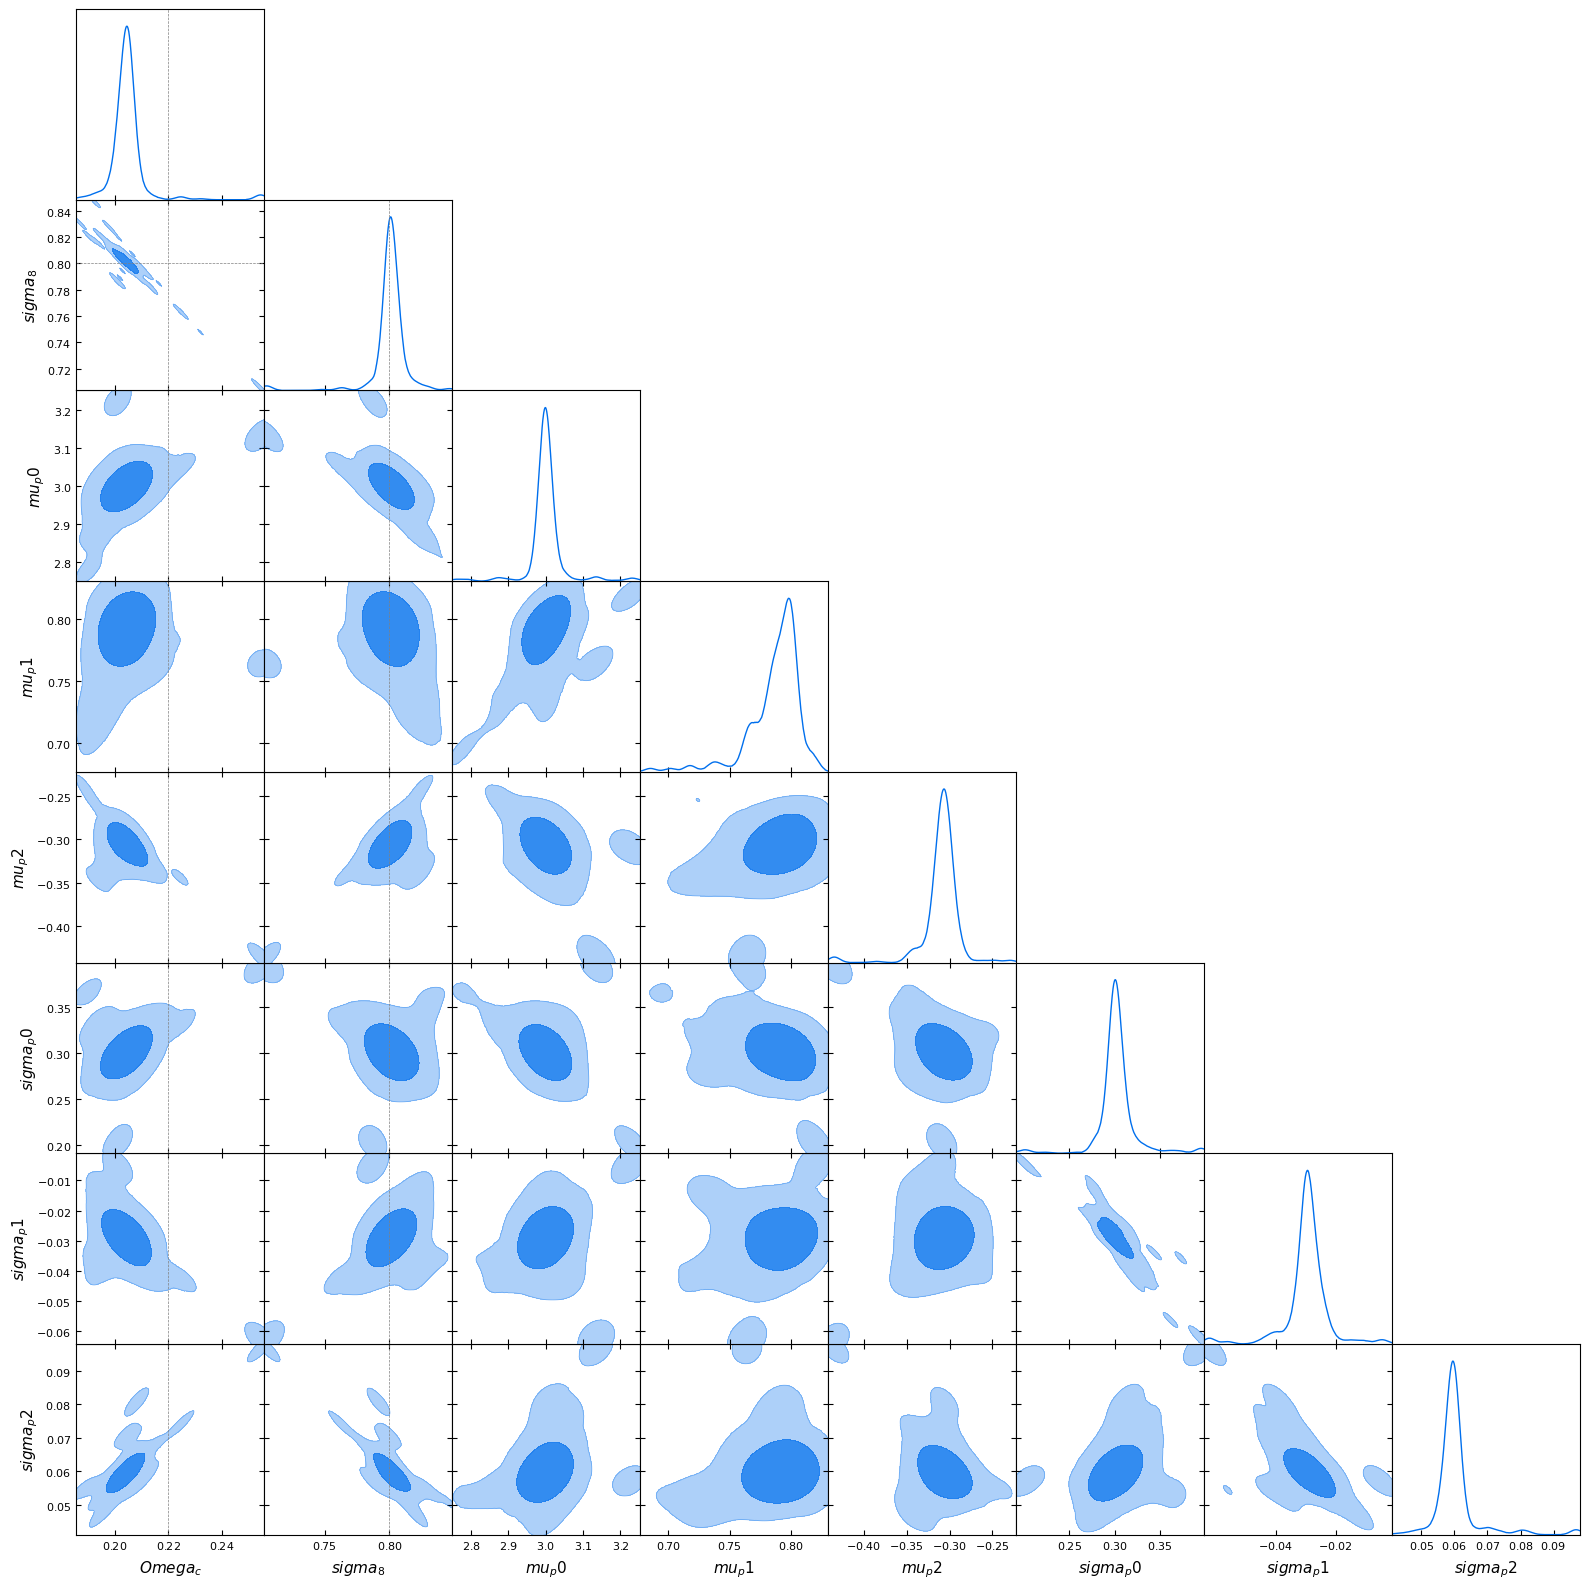

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/wazp_cosmoDC2/outputs/output_rp/number_counts_samples.txt
Removed no burn in
400


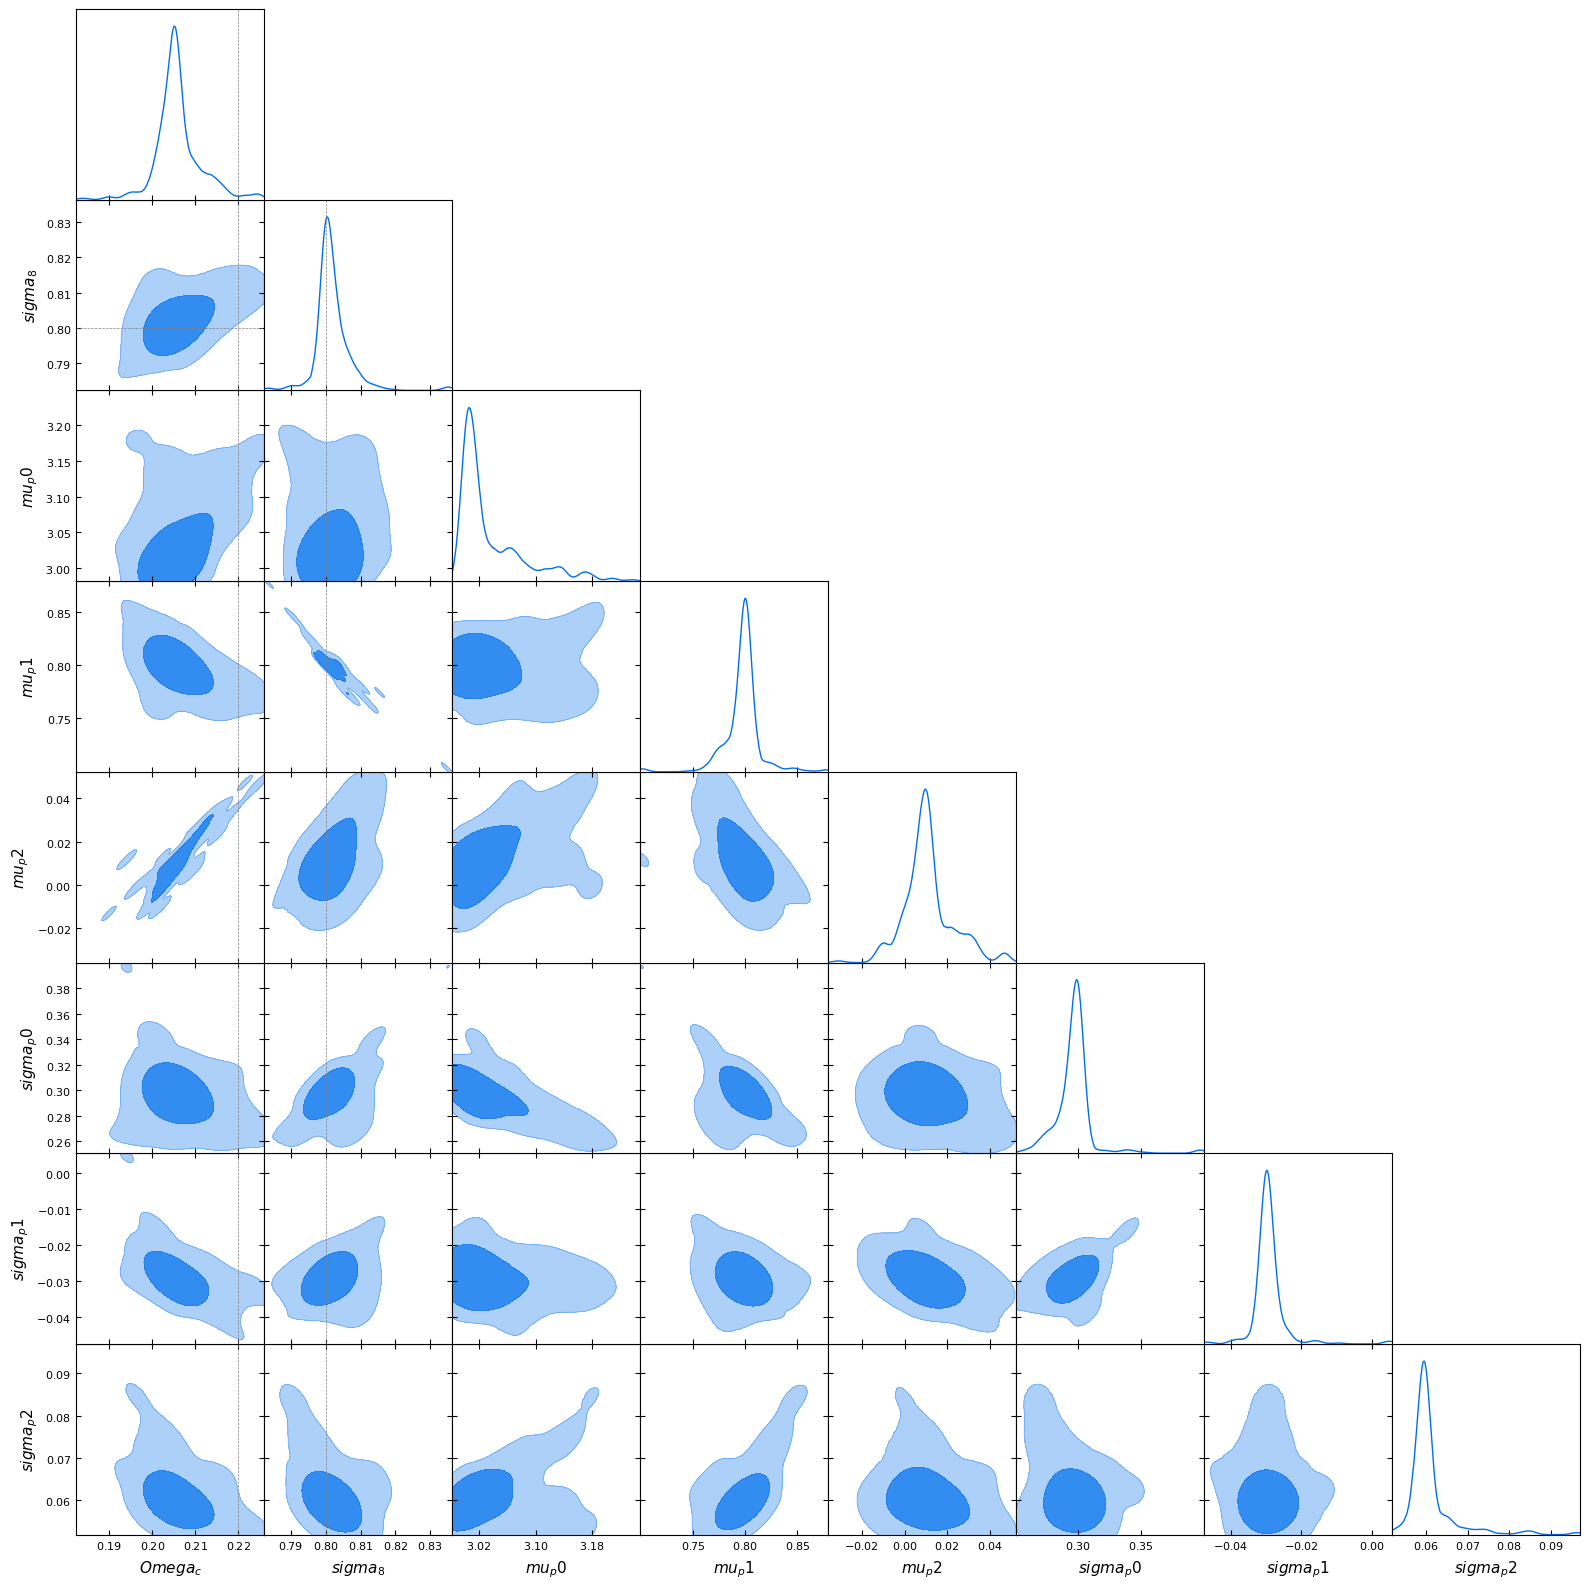

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt
Removed no burn in
200


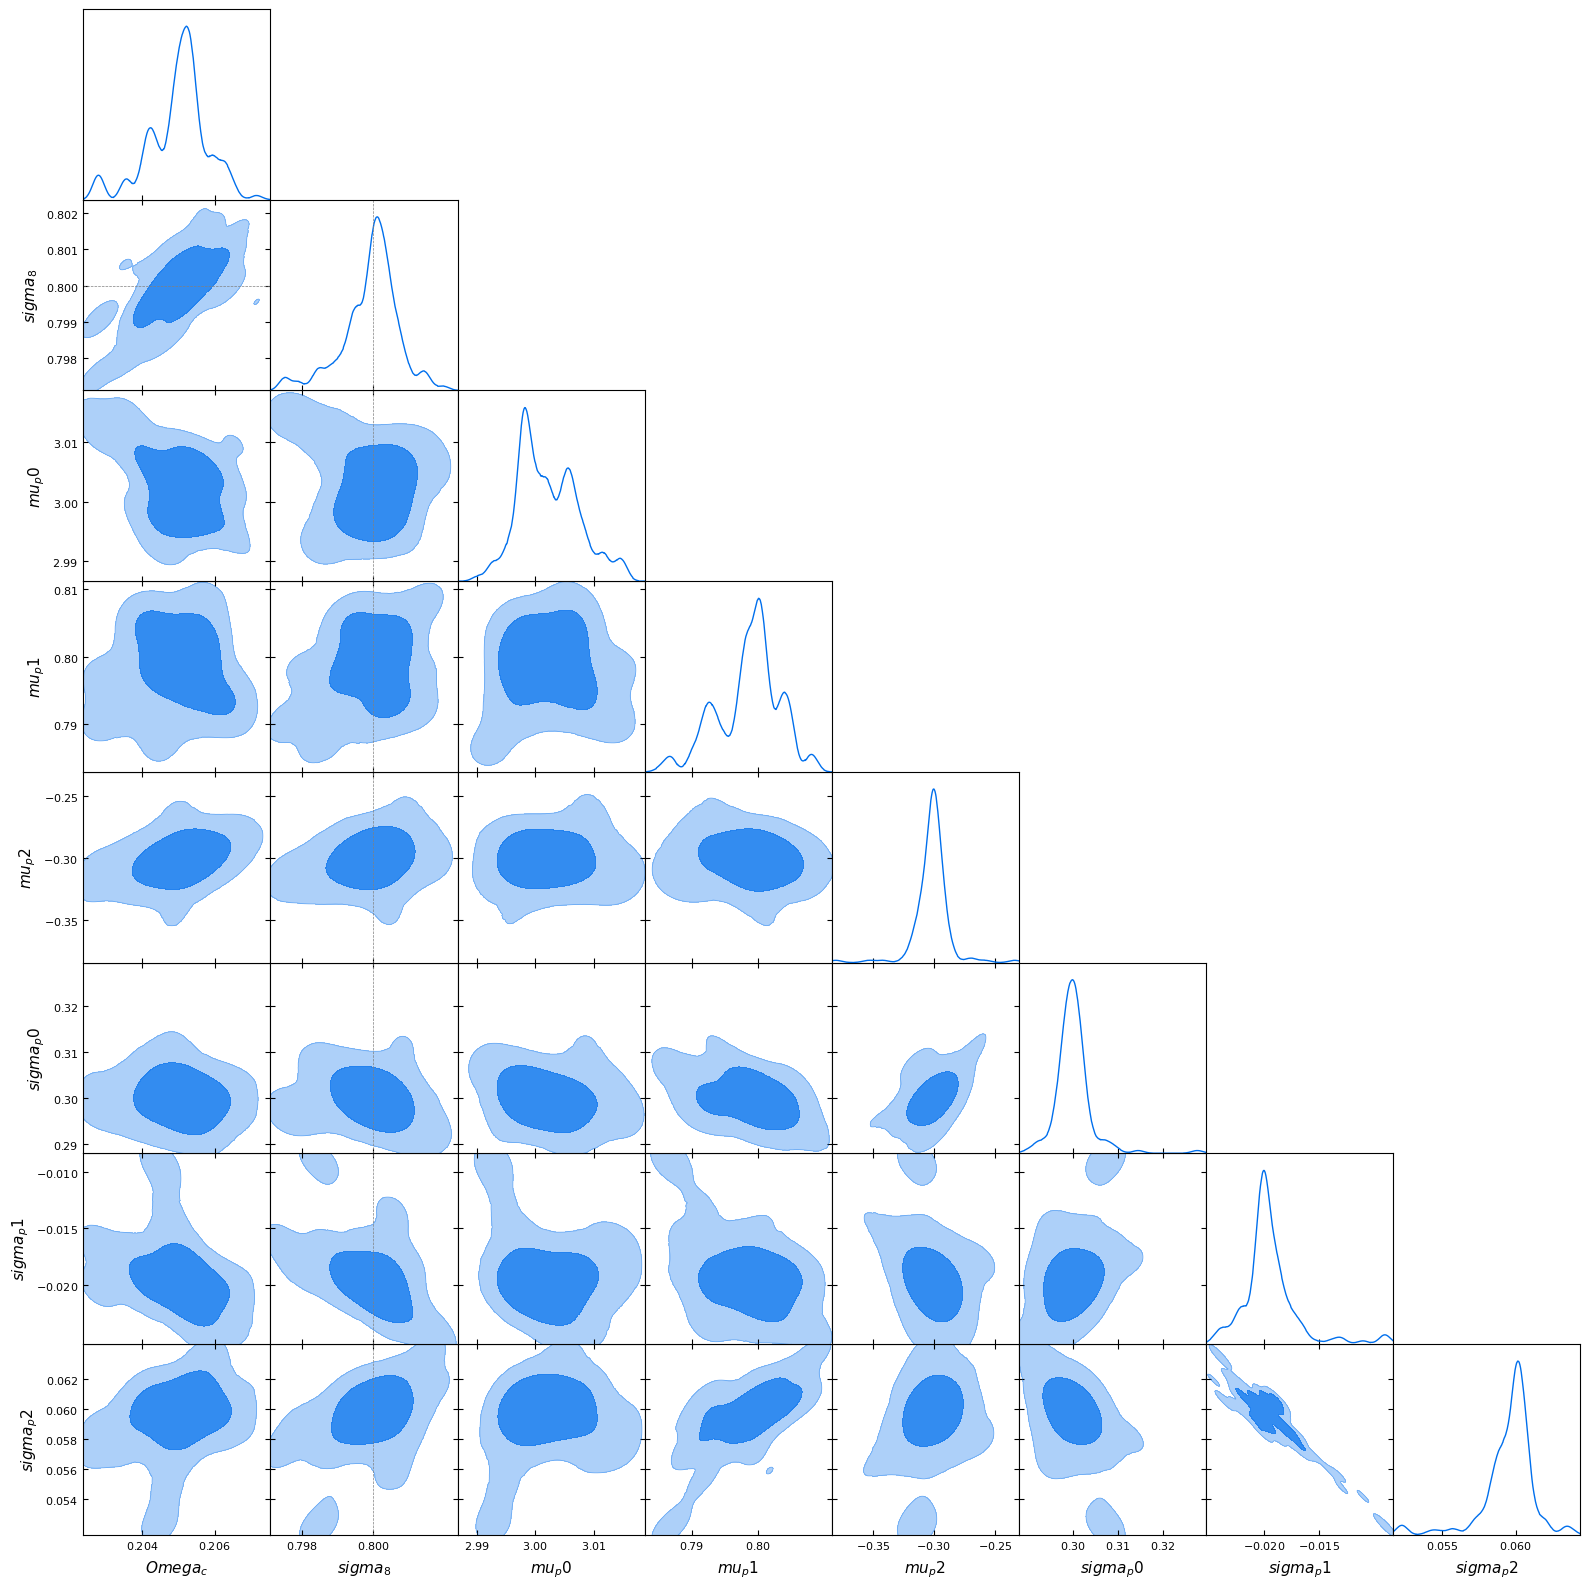

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[0.2054357620944768,
  0.7999347469746204,
  3.00056029221752,
  0.8012621802029813,
  -0.2974294469679942,
  0.2996090679058066,
  -0.019691609902636423,
  0.06004306848517704],
 [0.20543568380429172,
  0.7999194358372689,
  2.9993645382797323,
  0.8016629323122815,
  -0.29679393344345056,
  0.30037322409201017,
  -0.02109236079735412,
  0.060805745301793036],
 [0.2051640251646986,
  0.7998334313336295,
  3.0000707801597297,
  0.8001938411553003,
  -0.300559963634197,
  0.29957095297812425,
  -0.019769663869406946,
  0.06012808053924993],
 [0.2057676428230278,
  0.8000037326269908,
  2.997441390737798,
  0.7975999654269744,
  -0.29532942708962484,
  0.30015323731030163,
  -0.020415726315386826,
  0.06004532793921899],
 [0.20487932009058893,
  0.7996222759931596,
  3.002650373310363,
  0.799402339621718,
  -0.30118084268518996,
  0.29993720773815685,
  -0.020144262867128976,
  0.059994067061358514],
 [0.20502271969529207,
  0.8000899552406654,
  2.997761463960734,
  0.7991297179668175

In [21]:
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/examples/wazp_cosmoDC2/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])

generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])